In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

## Read In Data

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Create Dummy Variables

In [3]:
hr = pd.concat([hr,pd.get_dummies(hr['sales'])], axis = 1)
hr = pd.concat([hr,pd.get_dummies(hr['salary'])], axis = 1)
hr = hr.drop(['sales','salary'], axis = 1)

## Modeling

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
y = hr['left']
X = hr.drop(['left'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42, stratify = y)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[0:,:5])
X_train.iloc[0:,:5] = scaler.transform(X_train.iloc[0:,:5])
X_test.iloc[0:,:5] = scaler.transform(X_test.iloc[0:,:5])

/Users/prithvitanna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/prithvitanna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### KNN with grid search

In [6]:
param_grid = {'n_neighbors':[3,5,7]}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn,param_grid)
gs.fit(X_train,y_train)
confusion_matrix(y_test,gs.predict(X_test))
gs.score(X_test,y_test)

0.9553333333333334

### Random Forest with Tuning (Takes long time)

In [7]:
param_grid = {'n_estimators':[100,1000], 'max_depth': [10,30,None]}
rf = RandomForestClassifier()
gs_2 = GridSearchCV(rf,param_grid)
gs_2.fit(X_train,y_train)
gs_2.score(X_test,y_test)

0.9903333333333333

In [12]:
print(confusion_matrix(y_test, gs_2.predict(X_test)))

[[2282    4]
 [  25  689]]


### Random Forest No Tuning

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
print(confusion_matrix(y_test,rf.predict(X_test)))
print(precision_score(y_test,rf.predict(X_test)))
print(recall_score(y_test,rf.predict(X_test)))

0.9896666666666667
[[2281    5]
 [  26  688]]
0.9927849927849928
0.9635854341736695


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

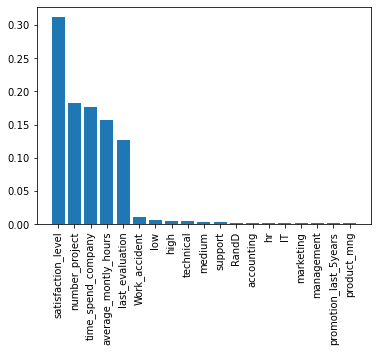

In [20]:
fi = pd.Series(rf.feature_importances_)
fi.index = X.columns
fi = fi.sort_values(ascending = False)
plt.bar(fi.index,fi)
plt.xticks(rotation = 90)

### XGBoost

In [9]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_test,y_test))
confusion_matrix(y_test,xgb.predict(X_test))

/Users/prithvitanna/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1634712680264/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9862222222222222


array([[3410,   19],
       [  43, 1028]])